In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Project/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: IDC/validation/1/12817_idx5_x401_y701_class1.png  
  inflating: IDC/validation/1/12817_idx5_x401_y851_class1.png  
  inflating: IDC/validation/1/12817_idx5_x601_y601_class1.png  
  inflating: IDC/validation/1/12817_idx5_x651_y551_class1.png  
  inflating: IDC/validation/1/12817_idx5_x651_y701_class1.png  
  inflating: IDC/validation/1/12817_idx5_x701_y451_class1.png  
  inflating: IDC/validation/1/12817_idx5_x751_y551_class1.png  
  inflating: IDC/validation/1/12817_idx5_x751_y851_class1.png  
  inflating: IDC/validation/1/12817_idx5_x851_y351_class1.png  
  inflating: IDC/validation/1/12817_idx5_x951_y651_class1.png  
  inflating: IDC/validation/1/12818_idx5_x1551_y1001_class1.png  
  inflating: IDC/validation/1/12818_idx5_x1551_y1651_class1.png  
  inflating: IDC/validation/1/12818_idx5_x1551_y1801_class1.png  
  inflating: IDC/validation/1/12818_idx5_x1601_y1401_class1.png  
  inflating: IDC/validation/1/12818_idx5_x160

In [ ]:
import cv2
import os
import keras
import glob
import random
import numpy as nump
import tensorflow as tnsr
import seaborn as s_brn
from tqdm import tqdm
import matplotlib.pyplot as mplot
from skimage.io import imread, imshow
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical, plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.regularization.dropout import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GRU, Reshape, Dropout, BatchNormalization
from pandas.core.algorithms import npt
from tensorflow.keras.models import load_model, Sequential
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split



In [ ]:

dataset=glob.glob("/content/IDC/*/*/*")

In [ ]:

len(dataset)

277524

In [ ]:

random.shuffle(dataset)
dataset

['/content/IDC/training/0/12883_idx5_x2351_y1_class0.png',
 '/content/IDC/training/0/12890_idx5_x2901_y1051_class0.png',
 '/content/IDC/training/0/10276_idx5_x501_y101_class0.png',
 '/content/IDC/training/1/13613_idx5_x2001_y1351_class1.png',
 '/content/IDC/testing/1/12817_idx5_x1051_y1051_class1.png',
 '/content/IDC/training/0/12826_idx5_x901_y1201_class0.png',
 '/content/IDC/testing/1/14082_idx5_x1451_y1801_class1.png',
 '/content/IDC/training/0/16550_idx5_x1201_y1001_class0.png',
 '/content/IDC/training/1/12890_idx5_x1151_y951_class1.png',
 '/content/IDC/training/0/12908_idx5_x2051_y951_class0.png',
 '/content/IDC/testing/0/10278_idx5_x3101_y1151_class0.png',
 '/content/IDC/validation/0/8865_idx5_x1751_y801_class0.png',
 '/content/IDC/training/0/15515_idx5_x1701_y251_class0.png',
 '/content/IDC/training/0/9029_idx5_x1851_y851_class0.png',
 '/content/IDC/training/1/8863_idx5_x1551_y1701_class1.png',
 '/content/IDC/training/0/10274_idx5_x1701_y301_class0.png',
 '/content/IDC/testing/1

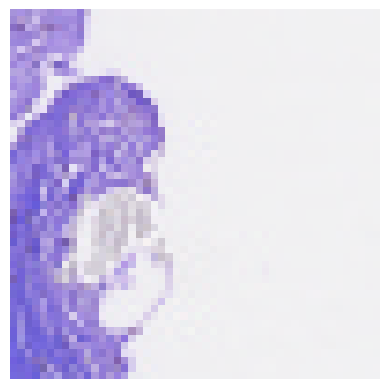

In [ ]:
img=cv2.imread(dataset[1])
mplot.imshow(img)
mplot.axis('off')
mplot.show()

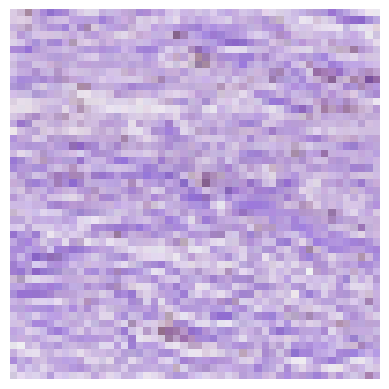

In [ ]:

img=cv2.imread(dataset[12])
mplot.imshow(img)
mplot.axis('off')
mplot.show()

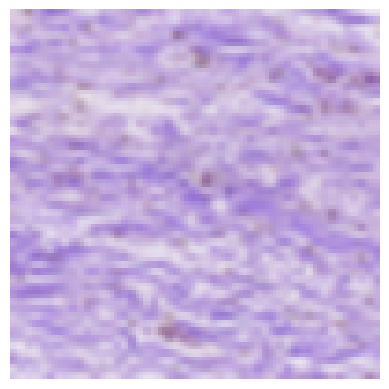

In [ ]:

img_resize=cv2.resize(img,(100,100))
mplot.imshow(img_resize)
mplot.axis('off')
mplot.show()

In [ ]:

X = []
Y = []
for i in tqdm(range(len(dataset))):
    try:

        image = cv2.imread(dataset[i])

        img_resize = cv2.resize(image, (50, 50))

        X.append(img_resize)

        classes = dataset[i].split(os.path.sep)[-2]

        if classes == '0':
            label = 0
        elif classes == '1':
            label = 1

        Y.append(label)

    except:
        continue

100%|██████████| 277524/277524 [00:40<00:00, 6880.53it/s]


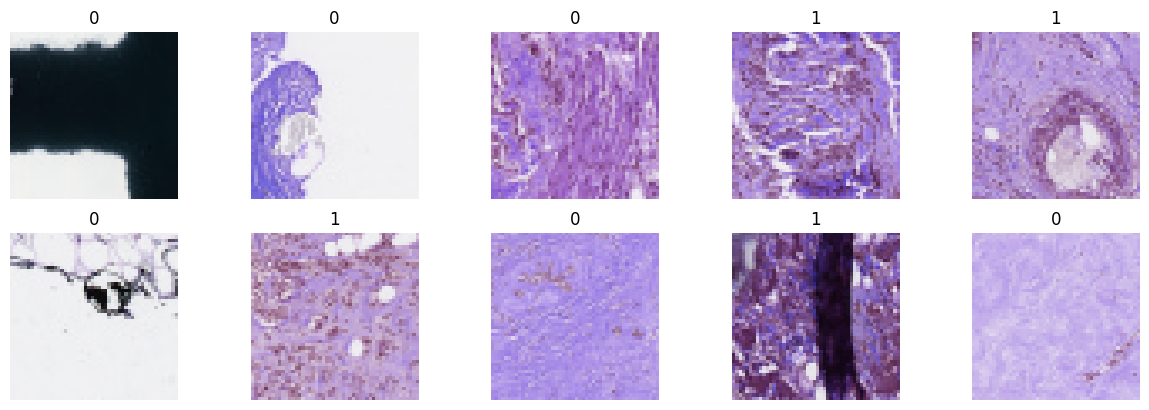

In [ ]:

mplot.figure(figsize=(15, 10))

for i in range(10):

    mplot.subplot(4, 5, i+1)

    mplot.imshow(X[i], cmap='gray')

    mplot.title(Y[i])

    mplot.axis("off")

In [ ]:

len(X),len(Y)

(277524, 277524)

In [ ]:
X=nump.array(X)
Y=nump.array(Y)

In [ ]:

X.shape

(277524, 50, 50, 3)

In [ ]:

Y.shape

(277524,)

In [ ]:
data_shape = X.shape[1]*X.shape[2]*X.shape[3]
X = X.reshape(X.shape[0], data_shape)
oversample = SMOTE()
X, Y  = oversample.fit_resample(X, Y)
for i in range(len(X)):
    X = X.reshape(len(X), 50,50,3)

In [ ]:
XTrns, XTsts, YTrns, YTsts= train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:

print(XTrns.shape,YTrns.shape)
print(XTsts.shape,YTsts.shape)

In [ ]:

YTrns= to_categorical(YTrns)
YTsts = to_categorical(YTsts)

In [ ]:

Fl_pth = '/content/drive/MyDrive/Project/my_best_model.hdf5'

Call_bks = ModelCheckpoint(filepath=Fl_pth,
                           monitor='val_accuracy',
                           verbose=1,
                           save_best_only=True,
                           mode='max')

In [ ]:
MDL_ = Sequential()

MDL_.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu', input_shape=(50,50,3)))
MDL_.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='same'))
MDL_.add(BatchNormalization())
MDL_.add(Dropout(0.3))

MDL_.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
MDL_.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='same'))
MDL_.add(BatchNormalization())
MDL_.add(Dropout(0.9))

MDL_.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
MDL_.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='same'))
MDL_.add(BatchNormalization())
MDL_.add(Dropout(0.5))

MDL_.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
MDL_.add(Dropout(0.9))
MDL_.add(Flatten())

MDL_.add(Dense(1024))
MDL_.add(Dropout(0.3))

MDL_.add(Dense(2000))
MDL_.add(Reshape((1, 2000)))

MDL_.add(GRU(512))

MDL_.add(Dense(2, activation='sigmoid'))

optmzr = tnsr.keras.optimizers.Adam(learning_rate=2e-5)

MDL_.compile(loss='binary_crossentropy', optimizer = optmzr, metrics=['accuracy'])

In [ ]:
MDL_.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 50, 50, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 256)      0

In [ ]:

datagen = ImageDataGenerator(

    rotation_range=45,

    width_shift_range=0.2,

    height_shift_range=0.2,

    horizontal_flip=True,

    vertical_flip=True,

    fill_mode='nearest')

In [ ]:

Fr_crv = MDL_.fit(datagen.flow(XTrns,YTrns), batch_size=50,
                    validation_data=datagen.flow(XTsts,YTsts),
                    epochs=10,callbacks=[Call_bks])

Epoch 1/10
9937/9937 [==============================] - ETA: 0s - loss: 0.3238 - accuracy: 0.8645
Epoch 1: val_accuracy improved from -inf to 0.75887, saving model to my_best_model.epoch01-loss0.76.hdf5
9937/9937 [==============================] - 537s 53ms/step - loss: 0.3238 - accuracy: 0.8645 - val_loss: 0.5042 - val_accuracy: 0.7589
Epoch 2/10
9937/9937 [==============================] - ETA: 0s - loss: 0.2971 - accuracy: 0.8752
Epoch 2: val_accuracy did not improve from 0.75887
9937/9937 [==============================] - 505s 51ms/step - loss: 0.2971 - accuracy: 0.8752 - val_loss: 0.8673 - val_accuracy: 0.5465
Epoch 3/10
9937/9937 [==============================] - ETA: 0s - loss: 0.2900 - accuracy: 0.8774
Epoch 3: val_accuracy did not improve from 0.75887
9937/9937 [==============================] - 507s 51ms/step - loss: 0.2900 - accuracy: 0.8774 - val_loss: 0.9618 - val_accuracy: 0.5242
Epoch 4/10
9937/9937 [==============================] - ETA: 0s - loss: 0.2898 - accuracy: 

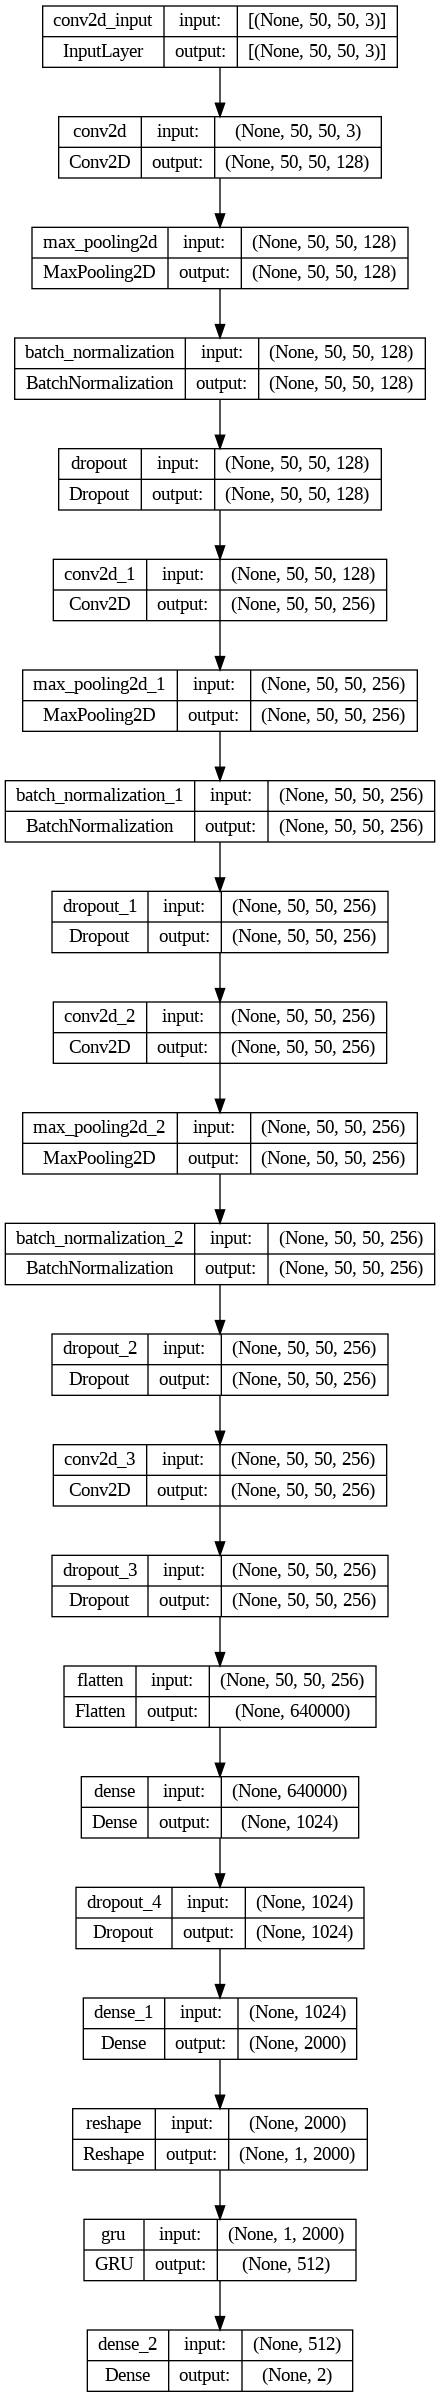

In [ ]:
tnsr.keras.utils.plot_model(MDL_, to_file='proposed_MDL_.png', show_shapes=True, show_layer_names=True)

In [ ]:
best_model = load_model('/content/drive/MyDrive/Project/my_best_model.hdf5')

In [ ]:
best_model.evaluate(XTrns, YTrns)

In [ ]:
best_model.evaluate(XTsts, YTsts)

In [ ]:

mplot.figure(figsize=(12,6))

mplot.plot(Fr_crv.history['accuracy'], label="Training accuracy")

mplot.plot(Fr_crv.history['val_accuracy'], label="Validation accuracy")

mplot.title("Accuracy",fontsize=16)
mplot.xlabel("Epochs",fontsize=16)
mplot.ylabel("Accuracy",fontsize=16)
mplot.legend()
mplot.show()

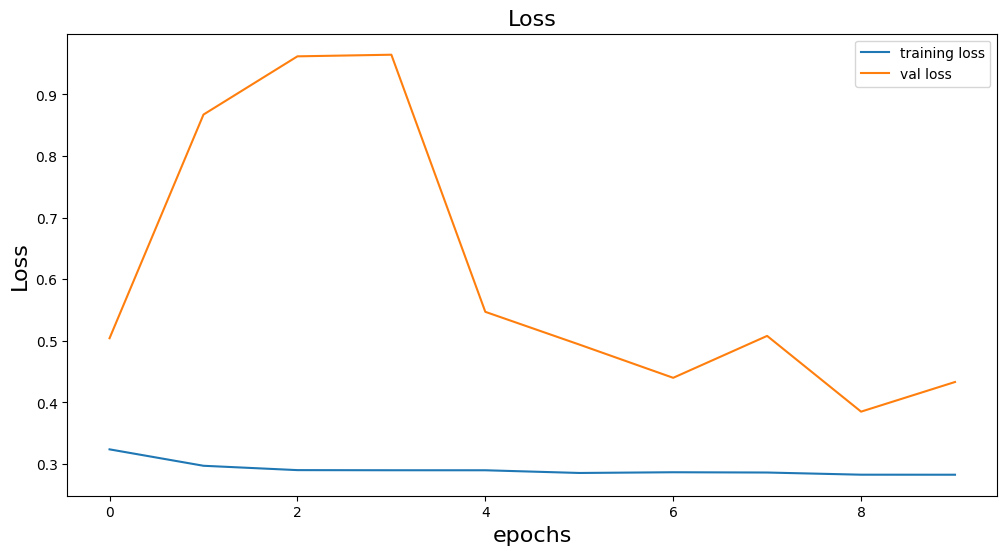

In [ ]:
mplot.figure(figsize=(12,6))

mplot.plot(Fr_crv.history['loss'], label="training loss")

mplot.plot(Fr_crv.history['val_loss'], label="val loss")

mplot.title("Loss",fontsize=16)
mplot.xlabel("epochs",fontsize=16)
mplot.ylabel("Loss",fontsize=16)

mplot.legend()

mplot.show()

In [ ]:

pred = best_model.predict(XTsts)

YTrue1 = nump.argmax(YTsts, axis=1)

YPred1 = nump.argmax(pred, axis=1)


2485/2485 [==============================] - 17s 7ms/step


In [ ]:

pred1 = best_model.predict(XTrns)

YTrue2 = nump.argmax(YTrns, axis=1)

YPred2 = nump.argmax(pred1, axis=1)

9937/9937 [==============================] - 69s 7ms/step


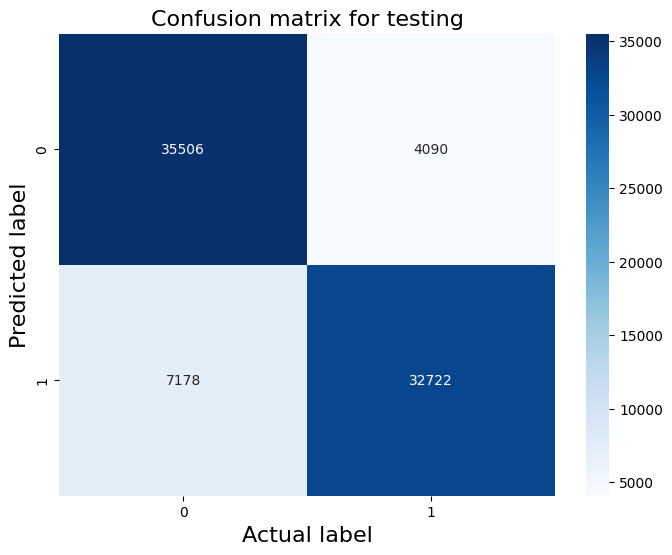

In [ ]:

sentiment_classes =  ['0', '1']

mplot.figure(figsize=(8,6))

s_brn.heatmap(confusion_matrix(YTrue1, YPred1), cmap=mplot.cm.Blues, fmt='d', annot=True, xticklabels=sentiment_classes, yticklabels=sentiment_classes)

mplot.title('Confusion matrix for testing', fontsize=16)

mplot.xlabel('Actual label', fontsize=16)

mplot.ylabel('Predicted label', fontsize=16);

In [ ]:

print('Classification report for testing:\n')
print(classification_report(YTrue1, YPred1))

Classification report for testing:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     39596
           1       0.89      0.82      0.85     39900

    accuracy                           0.86     79496
   macro avg       0.86      0.86      0.86     79496
weighted avg       0.86      0.86      0.86     79496



In [ ]:
cf=confusion_matrix(YTrue1 , YPred1)

snstvty = cf[0,0]/(cf[0,0]+cf[0,1]) )
print('Sensitivity for testing : ', snstvty )
spcfcty = cf[1,1]/(cf[1,0]+cf[1,1])
print('Specificity for testing : ', spcfcty)

Sensitivity for testing :  0.896706738054349
Specificity for testing :  0.8201002506265664


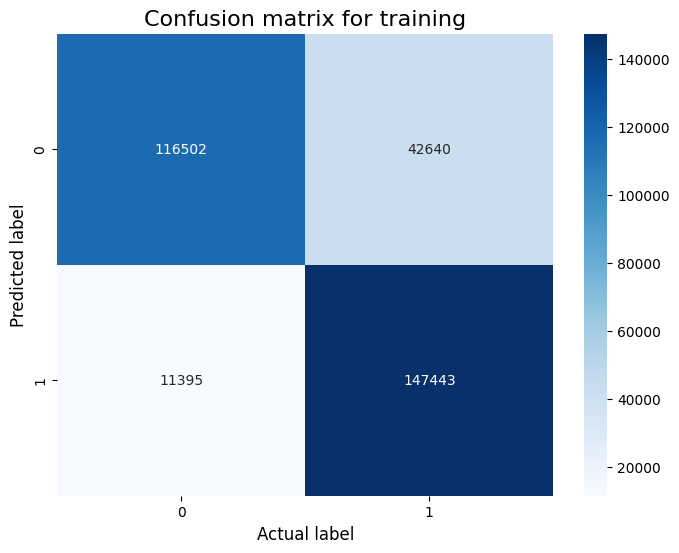

In [ ]:
mplot.figure(figsize=(8,6))
s_brn.heatmap(confusion_matrix(YTrue2, YPred2),cmap=mplot.cm.Blues,fmt ='d',annot=True,xticklabels=sentiment_classes,yticklabels=sentiment_classes)
mplot.title('Confusion matrix for training', fontsize=16)
mplot.xlabel('Actual label', fontsize=12)
mplot.ylabel('Predicted label', fontsize=12)


In [ ]:

print('Classification report for training:/n')
print(classification_report(YTrue2, YPred2))

Classification report for training:/n
              precision    recall  f1-score   support

           0       0.91      0.73      0.81    159142
           1       0.78      0.93      0.85    158838

    accuracy                           0.83    317980
   macro avg       0.84      0.83      0.83    317980
weighted avg       0.84      0.83      0.83    317980



In [ ]:
cf=confusion_matrix(YTrue2 , YPred2)

sensitivity2 = cf[0,0]/(cf[0,0]+cf[0,1])
print('Sensitivity for training : ', sensitivity2 )
specificity2 = cf[1,1]/(cf[1,0]+cf[1,1])
print('Specificity for training : ', specificity2)

Sensitivity for training :  0.7320631888502093
Specificity for training :  0.9282602399929488


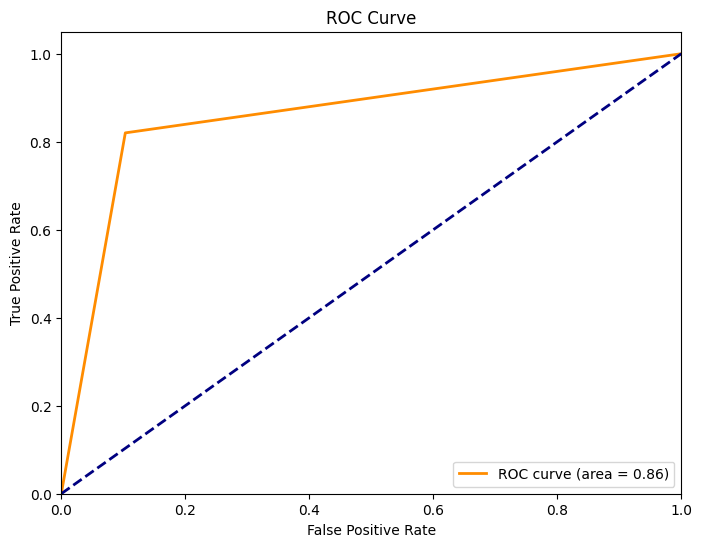

In [ ]:
fpr, tpr, thresholds = roc_curve(YTrue1.ravel(), YPred1.ravel())
roc_auc = auc(fpr, tpr)


FIG_, L = mplot.subplots(figsize=(8,6))
L.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
L.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
L.set_xlim([0.0, 1.0])
L.set_ylim([0.0, 1.05])
L.set_xlabel('False Positive Rate')
L.set_ylabel('True Positive Rate')
L.set_title('ROC Curve')
L.legend(loc="lower right")
mplot.show()